In [2]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense 
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras import backend as K
import numpy as np
import cv2
import matplotlib.pyplot as plt
#  to split the data of training and testing sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [2]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# conversion of class vectors to matrices of  binary class 
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [3]:
batch_size = 128
num_classes = 10
epochs = 10
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,optimizer='adam',metrics=['accuracy'])

In [10]:
hist = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
print("The model has successfully trained")
model.save('mnist.h5')
print("Saving the bot as mnist.h5")

Epoch 1/10
469/469 [==============================] - 40s 84ms/step - loss: 0.0114 - accuracy: 0.9961 - val_loss: 0.0267 - val_accuracy: 0.9920
Epoch 2/10
469/469 [==============================] - 40s 85ms/step - loss: 0.0098 - accuracy: 0.9966 - val_loss: 0.0260 - val_accuracy: 0.9916
Epoch 3/10
469/469 [==============================] - 41s 87ms/step - loss: 0.0095 - accuracy: 0.9967 - val_loss: 0.0320 - val_accuracy: 0.9913
Epoch 4/10
469/469 [==============================] - 40s 85ms/step - loss: 0.0086 - accuracy: 0.9971 - val_loss: 0.0267 - val_accuracy: 0.9932
Epoch 5/10
469/469 [==============================] - 39s 84ms/step - loss: 0.0093 - accuracy: 0.9970 - val_loss: 0.0261 - val_accuracy: 0.9926
Epoch 6/10
469/469 [==============================] - 40s 84ms/step - loss: 0.0073 - accuracy: 0.9975 - val_loss: 0.0282 - val_accuracy: 0.9919
Epoch 7/10
469/469 [==============================] - 39s 83ms/step - loss: 0.0074 - accuracy: 0.9977 - val_loss: 0.0316 - val_accuracy:

In [11]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.03275378420948982
Test accuracy: 0.992900013923645


In [12]:
finalArray = np.argmax(model.predict(x_test), axis=-1)

313/313 [==============================] - 3s 10ms/step


In [13]:
print(finalArray)

[7 2 1 ... 4 5 6]


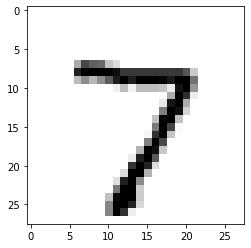

In [3]:
plt.imshow(x_test[0], cmap='binary')

In [1]:
# from keras.models import load_model
# model2=keras.models.load_model("offlineModel.h5py")
#this is how we load the already saved model
# model2.evaluate(X_test,y_test)

model = keras.models.load_model("mnist.h5")
img = st.file_uploader("please enter an image")
# # model.evaluate(X_test, y_test)

# image = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
# image = cv2.resize(image, (28,28))
# image = 255-image          #inverts image. Always gets read inverted.

# plt.imshow(image.reshape(28, 28),cmap='Greys')
# plt.show()
 pred = model.predict(image.reshape(1, 28, 28, 1), batch_size=1)

# print(pred.argmax())

IndentationError: unexpected indent (4072575711.py, line 16)